<a href="https://colab.research.google.com/github/LeonelThurler/Python/blob/main/Ejercicios_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - EFECTO FOTOELÉCTRICO

## INTRODUCCIÓN

Escriba una introducción al Efecto Fotoeléctrico. Trate de explicar a grandes rasgos en qué contexto histórico se desarrolló, quiénes fueron los científicos involucrados en el descubrimiento y de qué trata la experiencia.

In [ ]:
# aca va la introducción (usar una celda de texto y escribir en cursiva)

## DESARROLLO DEL TRABAJO

Dada una fotocélula con cátodo de Potasio y ánodo de Platino (o algún otro metal), se dispone un experimento con una configuración como la explicada en el apunte teórico.<br>
<br>
En primer lugar, se cuenta con una lámpara de mercurio y varios filtros para permitir sólo el paso de ciertas longitudes de onda provenientes de la misma. Fijando el filtro amarillo, e iniciando con un potencial de frenado $U = 0$, varíe la tensión con el reóstato hasta comprobar que no hay más corriente en el amperímetro (y un poco más). A medida que cambia de valor de tensión, anote tensión y corriente. La tensión deberá ser tomada con signo negativo (es decir, si lee 1V, debe anotar -1V), por convención. <br>
<br>
Esta parte de la práctica será con intensidad de la luz constante.

<hr>

<b><u>Nota 2021:</u></b> damos una tabla de valores por no poder medir en el laboratorio. La ley que sigue esta curva es de la forma $i(v) = A.(e^{B.(v + C)}-0.899)$. Se deben hallar los parámetros A, B y C.<br>
<br>
<table>
  <thead>
    <tr><th colspan=2>Color amarillo (578 nm)</th></tr>
    <tr><th>Tensión (V)</th><th>Corriente (pA)</th></tr>
  </thead>
    <tr><th>-3.00000</th><th>-7.37166</th></tr>
    <tr><th>-2.73333</th><th>-7.37154</th></tr>
    <tr><th>-2.46667</th><th>-7.37106</th></tr>
    <tr><th>-2.20000</th><th>-7.36926</th></tr>
    <tr><th>-1.93333</th><th>-7.36248</th></tr>
    <tr><th>-1.66667</th><th>-7.33693</th></tr>
    <tr><th>-1.40000</th><th>-7.24064</th></tr>
    <tr><th>-1.13333</th><th>-6.87778</th></tr>
    <tr><th>-0.86667</th><th>-5.51042</th></tr>
    <tr><th>-0.60000</th><th>-0.35770</th></tr>
    <tr><th>-0.59444</th><th>-0.16114</th></tr>
    <tr><th>-0.58889</th><th>0.04093</th></tr>
    <tr><th>-0.58333</th><th>0.24866</th></tr>
    <tr><th>-0.57778</th><th>0.46221</th></tr>
    <tr><th>-0.57222</th><th>0.68175</th></tr>
    <tr><th>-0.56667</th><th>0.90744</th></tr>
    <tr><th>-0.56111</th><th>1.13945</th></tr>
    <tr><th>-0.55556</th><th>1.37797</th></tr>
    <tr><th>-0.55000</th><th>1.62317</th></tr>
    <tr><th>-0.48889</th><th>4.81903</th></tr>
    <tr><th>-0.42778</th><th>9.15038</th></tr>
    <tr><th>-0.36667</th><th>15.02066</th></tr>
    <tr><th>-0.30556</th><th>22.97663</th></tr>
    <tr><th>-0.24444</th><th>33.75934</th></tr>
    <tr><th>-0.18333</th><th>48.37314</th></tr>
    <tr><th>-0.12222</th><th>68.17920</th></tr>
    <tr><th>-0.06111</th><th>95.02232</th></tr>
</table>

Cte A: 8.199867537851476
Cte B: 4.974883206482456
Cte C: 0.5686006042389258


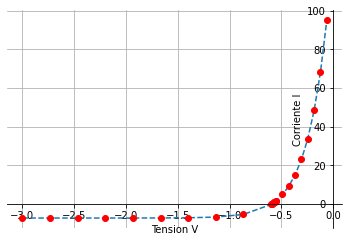

In [ ]:
# aca va la curva tensión de frenado versus la corriente observada
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from scipy import optimize
from scipy.optimize import curve_fit

# Datos del ejercicio
v = np.array([-3.00000, -2.73333, -2.46667, -2.20000, -1.93333, -1.66667, -1.40000, -1.13333, -0.86667, -0.60000, -0.59444, -0.58889, -0.58333, -0.57778, -0.57222, -0.56667, -0.56111, -0.55556, -0.55000, -0.48889, -0.42778, -0.36667, -0.30556, -0.24444, -0.18333, -0.12222, -0.06111])
i = np.array([-7.37166,-7.37154,-7.37106,-7.36926,-7.36248,-7.33693,-7.24064,-6.87778,-5.51042,-0.35770,-0.16114,0.04093,0.24866,0.46221,0.68175,0.90744,1.13945,1.37797,1.62317,4.81903,9.15038,15.02066,22.97663,33.75934,48.37314,68.17920,95.02232])

#Funcion del problema
def func(v, a, b, c):
  return a*(np.exp(b*(v+c)) - 0.899)

#Utilizo la funcion curve_fit para averiguar los parametros A,B y C
parametros, params_covariance = optimize.curve_fit (func,v,i)
c=parametros[2]
b=parametros[1]
a=parametros[0]
print("Cte A:",a)
print("Cte B:",b)
print("Cte C:",c)

#Ejes del grafico
ax = pl.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Grafica
plt.plot(v, func(v,a,b,c),"--")
plt.xlabel("Tension V")
plt.ylabel("Corriente I")
plt.plot(v, i, "o", color = "red")
plt.grid(True)
plt.show()

En segundo lugar, determine el valor de $U_0$ hallando el primer valor de tensión en el cual la corriente se hace cero. Hay varias formas de determinar este potencial, algunas de las cuales son más precisas que otras. Para este trabajo, consideraremos el cruce de la curva con el eje de las abcisas (o sea, la tensión $U$).

In [28]:
# aca va el valor de U0
import sympy as sp
import pandas as pd
import numpy as np

a= 8.199867537851476
b= 4.974883206482456
c= 0.5686006042389258
def samesign(a, b):
        return a * b > 0

def biseccion(funci, inferior, superior):
    assert not samesign(funci(inferior), funci(superior))
    for i in range(54):
        c = (inferior + superior) / 2.0
        if samesign(funci(inferior), funci(c)):
            inferior = c
        else:
            superior = c
    return c

def f(v):
        return a*(np.exp(b*(v+c)) - 0.899)

v = biseccion(f, -0.75, -0.5)
print ("El valor de V0 es",v,"para que la funcion sea", f(v))

El valor de V0 es -0.590002562856121 para que la funcion sea 0.0


Ahora proceda a hallar un valor de $U_0$ para cada 
filtro de color.<br>
<br>
La ley que sigue la curva del color verde (546 nm) es de la forma $i(v) = A.(e^{B.(v + C)}-0,5201)$. Se deben hallar los parámetros A, B y C (si se calcularon para el amarillo, son los mismos, sólo hay que despejar el valor de $v$ cuando $i(v) = 0$, o sea, puede no usarse la tabla).<br>
Debe realizarse el gráfico de la curva, a partir de la ley.
<br>
<table>
  <thead>
    <tr><th colspan=2>Color verde (546 nm)</th></tr>
    <tr><th>Tensión (V)</th><th>Corriente (pA)</th></tr>
  </thead>
    <tr><th>-3.00000</th><th>-4.26472</th></tr>
    <tr><th>-2.75556</th><th>-4.26461</th></tr>
    <tr><th>-2.51111</th><th>-4.26425</th></tr>
    <tr><th>-2.26667</th><th>-4.26301</th></tr>
    <tr><th>-2.02222</th><th>-4.25884</th></tr>
    <tr><th>-1.77778</th><th>-4.24476</th></tr>
    <tr><th>-1.53333</th><th>-4.19725</th></tr>
    <tr><th>-1.28889</th><th>-4.03696</th></tr>
    <tr><th>-1.04444</th><th>-3.49615</th></tr>
    <tr><th>-0.80000</th><th>-1.67147</th></tr>
    <tr><th>-0.78333</th><th>-1.44728</th></tr>
    <tr><th>-0.76667</th><th>-1.20371</th></tr>
    <tr><th>-0.75000</th><th>-0.93908</th></tr>
    <tr><th>-0.73333</th><th>-0.65158</th></tr>
    <tr><th>-0.71667</th><th>-0.33922</th></tr>
    <tr><th>-0.70000</th><th>0.00014</th></tr>
    <tr><th>-0.68333</th><th>0.36884</th></tr>
    <tr><th>-0.66667</th><th>0.76941</th></tr>
    <tr><th>-0.65000</th><th>1.20461</th></tr>
    <tr><th>-0.57778</th><th>3.56916</th></tr>
    <tr><th>-0.50556</th><th>6.95595</th></tr>
    <tr><th>-0.43333</th><th>11.80693</th></tr>
    <tr><th>-0.36111</th><th>18.75512</th></tr>
    <tr><th>-0.28889</th><th>28.70717</th></tr>
    <tr><th>-0.21667</th><th>42.96173</th></tr>
    <tr><th>-0.14444</th><th>63.37888</th></tr>
    <tr><th>-0.07222</th><th>92.62285</th></tr>
    <tr><th>0.00000</th><th>134.50970</th></tr>
</table>

Cte A: 8.199802068589333
Cte B: 4.974911282052066
Cte C: 0.5686002548158544
El valor de V0 es -0.7000064530653749 para que la corriente sea 1.820721810783373e-15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


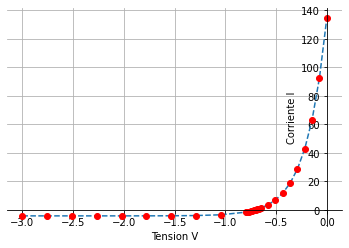

In [56]:
# aca va el valor de U0 para el verde y la grafica
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import sympy as sp
import pandas as pd
from scipy import optimize
from scipy.optimize import curve_fit

# Datos del ejercicio
v = np.array([-3.00000,-2.75556,-2.51111,-2.26667,-2.02222,-1.77778,-1.53333,-1.28889,-1.04444,-0.80000,-0.78333,-0.76667,-0.75000,-0.73333,-0.71667,-0.70000,-0.68333,-0.66667,-0.65000,-0.57778,-0.50556,-0.43333,-0.36111,-0.28889,-0.21667,-0.14444,-0.07222,0.00000])
i = np.array([-4.26472,-4.26461,-4.26425,-4.26301,-4.25884,-4.24476,-4.19725,-4.03696,-3.49615,-1.67147,-1.44728,-1.20371,-0.93908,-0.65158,-0.33922,0.00014,0.36884,0.76941,1.20461,3.56916,6.95595,11.80693,18.75512,28.70717,42.96173,63.37888,92.62285,134.50970])

#Funcion del problema
def func(v, a, b, c):
  return a*(np.exp(b*(v+c)) - 0.5201)

#Utilizo la funcion curve_fit para averiguar los parametros A,B y C
parametros, params_covariance = optimize.curve_fit (func,v,i)
c=parametros[2]
b=parametros[1]
a=parametros[0]
print("Cte A:",a)
print("Cte B:",b)
print("Cte C:",c)

#Utilizo el metodo de biseccion para encontrar la tension que hace que la corriente sea 0
def samesign(a, b):
        return a * b > 0

def biseccion(funci, inferior, superior):
    assert not samesign(funci(inferior), funci(superior))
    for i in range(54):
        c = (inferior + superior) / 2.0
        if samesign(funci(inferior), funci(c)):
            inferior = c
        else:
            superior = c
    return c

def f(t):
        return a*(np.exp(b*(t+c)) - 0.5201)

t = biseccion(f, -3, -0.5)
print ("El valor de V0 es",t,"para que la corriente sea",f(t))

#Ejes del grafico
ax = pl.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Grafica
plt.plot(v, func(v,a,b,c),"--")
plt.xlabel("Tension V")
plt.ylabel("Corriente I")
plt.plot(v, i, "o", color = "red")
plt.grid(True)
plt.show()

La ley que sigue la curva del color azul (436 nm) es de la forma $i(v) = A.(e^{B.(v + C)}-0,0372)$. Los parámetros A, B y C son los mismos que para el verde.<br>
Debe realizarse el gráfico de la curva, a partir de la ley.
<br>

El valor de V0 es -1.230209343118578 para que la corriente sea -5.689755658707973e-17


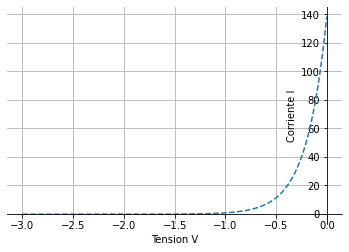

In [55]:
# aca va el valor de U0 para el azul y la grafica
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import sympy as sp
import pandas as pd

#Constantes halladas anteriormente
A= 8.199802068589333
B= 4.974911282052066
C= 0.5686002548158544

#Utilizo el metodo de biseccion para encontrar la tension que hace que la corriente sea 0
def samesign(a, b):
        return a * b > 0

def biseccion(funci, inferior, superior):
    assert not samesign(funci(inferior), funci(superior))
    for i in range(54):
        c = (inferior + superior) / 2.0
        if samesign(funci(inferior), funci(c)):
            inferior = c
        else:
            superior = c
    return c

def f(t):
        return a*(np.exp(b*(t+c)) - 0.0372)

t = biseccion(f, -3, -0.5)
print ("El valor de V0 es",t,"para que la corriente sea",f(t))

#Ejes del grafico
ax = pl.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Grafica
v= np.linspace(-3, 0, 1000)
plt.plot(v, f(v),"--")
plt.xlabel("Tension V")
plt.ylabel("Corriente I")
plt.grid(True)
plt.show()

La ley que sigue la curva del color violeta (405 nm) es de la forma $i(v) = A.(e^{\frac{B}{2}.(v - \frac{C}{2})}-0,0159)$. Los parámetros A, B y C son los mismos que para el verde.<br>
Debe realizarse el gráfico de la curva, a partir de la ley.
<br>

El valor de V0 es -1.3806285255712085 para que la corriente sea 0.0


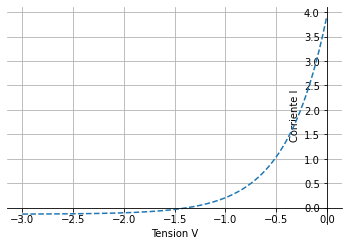

In [54]:
# aca va el valor de U0 para el violeta y la grafica
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import sympy as sp
import pandas as pd

#Constantes halladas anteriormente
A= 8.199802068589333
B= 4.974911282052066
C= 0.5686002548158544

#Utilizo el metodo de biseccion para encontrar la tension que hace que la corriente sea 0
def samesign(a, b):
        return a * b > 0

def biseccion(funci, inferior, superior):
    assert not samesign(funci(inferior), funci(superior))
    for i in range(54):
        c = (inferior + superior) / 2.0
        if samesign(funci(inferior), funci(c)):
            inferior = c
        else:
            superior = c
    return c

def f(t):
        return a*(np.exp((b/2)*(t-c/2)) - 0.0159)

t = biseccion(f, -3, -0.5)
print ("El valor de V0 es",t,"para que la corriente sea",f(t))

#Ejes del grafica
ax = pl.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Grafica
v= np.linspace(-3, 0, 1000)
plt.plot(v, f(v),"--")
plt.xlabel("Tension V")
plt.ylabel("Corriente I")
plt.grid(True)
plt.show()

Si todos los pasos fueron ejecutados correctamente, deberá tener una tabla de frecuencias (expresadas en $\text{[THz]} = 10^{\text{12}} \text{[Hz]}$) contra tensiones de corte $U_0$ (expresadas en $\text{[Volt]}$).<br>
<br>
En estas condiciones, arme un gráfico X-Y, colocando en X las frecuencias y en Y las tensiones contenidas en la tabla, cambiando el signo de las tensiones (de negativas a positivas, también, por convención) y agregando el error producto de la medición tal cual se explica más abajo. Ajuste una recta a todos los puntos y halle:
- Pendiente
- Cruce con el eje X (frecuencias)
- Ordenada al origen

<br><b>Error en tensiones:</b> si bien estamos considerando formas matemáticas para las curvas de tensión y corriente, estas tensiones pueden ser medidas (como hacemos con el color amarillo). Por este motivo, a las tensiones halladas hay que agregarles el error instrumental (despreciamos el de operación). Consideraremos el error de los instrumentos analógicos (mínima división sobre 2) y lo fijaremos en 0,1 V.

<br>¿Por qué no consideramos error en las frecuencias? Piense en las magnitudes y unidades de la frecuencia y ensaye una explicación.

In [ ]:
# aca va la grafica de ajuste

Indique:
- ¿Qué significa la ordenada al origen multiplicada por la carga del electrón?
- ¿Qué significa el punto donde la curva cruza por el eje de las abcisas?
- Valor de la constante de Planck junto con su error.
- Calidad del ajuste R^2.

In [ ]:
# aca van las soluciones de las preguntas y la cte. de Planck

Usando este <a href="https://phet.colorado.edu/es/simulation/photoelectric">simulador</a>, probaremos qué pasa con distintos materiales y con distintas intensidades de luz (requiere Java). De no poder ejecutarlo en el navegador, pruebe descargando la <i>aplicación .jar</i> a su computadora y ejecutándola local.<br>
<br>
<i>1) Seleccione sodio, luz al 100% y longitud de onda de 400 nm. La tensión de corte está en -0.8V. En estas condiciones, varíe la intensidad de la luz. Registre su observación.<br>
2) Ahora, ubique el dial de tensión en -0.4V y luz al 100%. Registre su observación.<br>
3) Por último, con el dial de tensión en -0.4V, varíe la intensidad lumínica de 100% a 80%, 60% y 40%. Registre sus observaciones.</i><br>
<br>
Con todos estos registros y junto a la teoría, ¿qué conclusiones puede obtener?<br>
<br>
<i>1) Seleccione sodio, luz al 100% y longitud de onda en 300 nm. La tensión de corte está en -1.8V. En estas condiciones, seleccione calcio y registre dónde se ubica la nueva tensión de corte.<br>
2) Vuelva al sodio y coloque el dial de tensión en 0V, registrando la corriente. Una vez hecho esto, cambie a calcio y registre la nueva corriente.</i><br>
<br>
Con todos estos registros y junto a la teoría, ¿qué conclusiones puede obtener?


In [ ]:
# aca van las respuestas (usar una celda de texto y escribir en cursiva)

## CONCLUSIONES

Intente resumir los resultados del trabajo, resaltando lo que le pareció más importante. Vincule los resultados con el Efecto Fotoeléctrico según lo que describió en la Introducción de este TP.

In [ ]:
# aca van las conclusiones (usar una celda de texto y escribir en cursiva)